In [1]:
import numpy as np
from Utilities import PlotImages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from PIL import Image as im
import random

In [2]:
data = np.load("/work/MA490_DeepLearning/Share/Dice/CleanedDiceData64.npz", allow_pickle=True)

In [3]:
images = data["images"]
labels = data["labels"]

In [4]:
labels

array(['d6,1', 'd12,5', 'd20,10', ..., 'd%,6', 'd10,8', 'd10,5'],
      dtype='<U6')

In [5]:
rotatedImages = []
rotatedLabels = []
for k, die in enumerate(images):
    die90 = np.rot90(die)
    die180 = np.rot90(die90)
    die270 = np.rot90(die180)
    rotatedImages.append(die)
    rotatedImages.append(die90)
    rotatedImages.append(die180)
    rotatedImages.append(die270)
    rotatedLabels.append(labels[k])
    rotatedLabels.append(labels[k])
    rotatedLabels.append(labels[k])
    rotatedLabels.append(labels[k])
random.Random(4).shuffle(rotatedImages)
random.Random(4).shuffle(rotatedLabels)

In [6]:
newImages = np.array(rotatedImages)/255.0
newLabels = np.array(rotatedLabels)
print("Num Images: ", len(newImages))

Num Images:  11072


In [7]:
newImages

array([[[[0.35686275, 0.37647059, 0.38823529],
         [0.36862745, 0.38823529, 0.4       ],
         [0.35686275, 0.37647059, 0.38039216],
         ...,
         [0.36862745, 0.37647059, 0.38039216],
         [0.38823529, 0.39215686, 0.39607843],
         [0.37647059, 0.38431373, 0.38039216]],

        [[0.35686275, 0.37647059, 0.38823529],
         [0.35686275, 0.37647059, 0.38823529],
         [0.30588235, 0.3254902 , 0.3372549 ],
         ...,
         [0.37647059, 0.38431373, 0.38823529],
         [0.37647059, 0.39215686, 0.40392157],
         [0.37254902, 0.38039216, 0.38431373]],

        [[0.35686275, 0.37647059, 0.39215686],
         [0.34901961, 0.36862745, 0.38039216],
         [0.3372549 , 0.35686275, 0.36862745],
         ...,
         [0.36470588, 0.38039216, 0.38431373],
         [0.36078431, 0.37647059, 0.38039216],
         [0.35686275, 0.36470588, 0.36078431]],

        ...,

        [[0.67058824, 0.58823529, 0.4745098 ],
         [0.67843137, 0.61176471, 0.51372549]

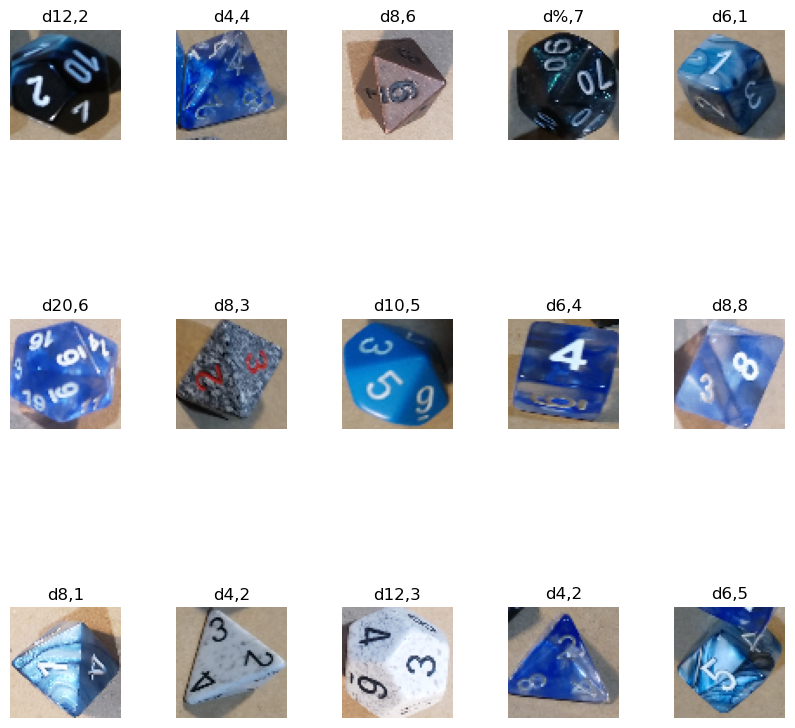

In [8]:
PlotImages(0, 15, 3, 5, newImages, newLabels)
plt.show()

In [9]:
np.savez_compressed('./RotatedDiceImages64pix.npz',
                    images=newImages,
                    labels=newLabels)

In [11]:
data1 = np.load("/home/petrisjs/recognizing-dice-values/RotatedDiceImages64pix.npz", allow_pickle=True)

In [12]:
np.random.shuffle(data1)

KeyError: '0 is not a file in the archive'